In [2]:
'''Read and mine tests'''

'Read and mine tests'

In [3]:
#modules
import csv
import numpy
import collections
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [4]:
#files
folder='D:/IA/Kaggle/Facebook/'
training=folder+'train.csv'

In [89]:
#observ the maximums
xmin,xmax,ymin,ymax=10,0,10,0
with open(training,newline='') as f :
    reader=csv.reader(f)
    reader.__next__()
    for line in reader:
        x,y=float(line[1]),float(line[2])
        xmin,xmax,ymin,ymax=min(xmin,x),max(xmax,x),min(ymin,y),max(ymax,y)

In [13]:
#classic data
print(r0)
print(r1)
print(",".join(r2))

['row_id', 'x', 'y', 'accuracy', 'time', 'place_id']
['0', '0.7941', '9.0809', '54', '470702', '8523065625']
1,5.9567,4.7968,13,186555,1757726713


In [32]:
#sub-square
xm,xM,ym,yM=0.5,1,5,5.5

In [33]:
#create cell (a file with a sub-part of events)
with open(folder+'cell.csv', 'w',newline='') as file:
    writter = csv.writer(file)
    with open(training,newline='') as f :
        reader=csv.reader(f)
        reader.__next__()
        for line in reader:
            x,y=float(line[1]),float(line[2])
            if xm < x and x < xM and ym < y and y < yM:
                writter.writerow(line)

In [46]:
#compute repartition of events over same styled sub square
grid = [[0] * 20 for _ in range(20)]
with open(training,newline='') as f :
    reader=csv.reader(f)
    reader.__next__()
    for line in reader:
        x,y=float(line[1]),float(line[2])
        grid[min(int(x//0.5),19)][min(int(y//0.5),19)]+=1

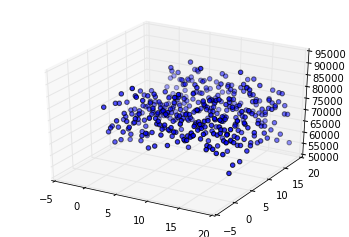

In [86]:
#plot this repartition
Z=sum(grid,[])
X=sum([[i]*20 for i in range(20)],[])
Y=list(range(20))*20
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(X), np.array(Y), Z)

In [90]:
#save head
with open(training,newline='') as f :
    reader=csv.reader(f)
    head=reader.__next__()

In [92]:
#show head
for p,i in enumerate(head):
    print(p,":",i)

0 : row_id
1 : x
2 : y
3 : accuracy
4 : time
5 : place_id


In [12]:
#count occurence of place_id
d=collections.defaultdict(int)
with open(folder+'cell.csv',newline='') as file:
    reader = csv.reader(file)
    for line in reader:
        d[int(line[5])]+=1


In [13]:
#count the number of id_values that have each occurence number
dd=collections.defaultdict(int)
for v in d.values():
    if(v>0):
        dd[v]+=1

defaultdict(<class 'int'>, {1: 904, 2: 312, 3: 158, 4: 100, 5: 57, 6: 51, 7: 37, 8: 32, 9: 26, 10: 19, 11: 17, 12: 11, 13: 17, 14: 11, 15: 19, 16: 8, 17: 7, 18: 8, 19: 9, 20: 5, 21: 6, 22: 9, 23: 4, 24: 6, 25: 2, 26: 5, 27: 7, 28: 4, 29: 2, 30: 5, 1029: 1, 32: 4, 33: 3, 34: 1, 35: 3, 36: 4, 37: 4, 38: 2, 96: 1, 40: 3, 41: 2, 554: 1, 43: 2, 44: 2, 45: 4, 46: 7, 47: 3, 48: 1, 49: 3, 50: 1, 52: 1, 54: 1, 55: 2, 56: 1, 57: 3, 58: 1, 59: 1, 60: 4, 61: 3, 63: 1, 64: 1, 65: 1, 579: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 3, 75: 4, 76: 1, 77: 2, 78: 3, 79: 1, 80: 1, 81: 3, 82: 1, 83: 2, 84: 2, 85: 2, 87: 3, 88: 2, 90: 1, 527: 2, 92: 4, 94: 3, 95: 1, 171: 2, 609: 1, 99: 3, 100: 2, 101: 6, 103: 3, 104: 3, 106: 1, 107: 1, 108: 1, 109: 1, 110: 3, 111: 4, 112: 4, 115: 1, 116: 1, 117: 2, 120: 1, 121: 2, 122: 1, 123: 1, 124: 1, 125: 2, 126: 1, 127: 3, 128: 1, 129: 1, 130: 1, 131: 1, 178: 1, 133: 1, 135: 2, 648: 1, 137: 1, 138: 2, 139: 1, 140: 4, 143: 1, 144: 1, 658: 1, 147: 3, 149: 2, 150: 1

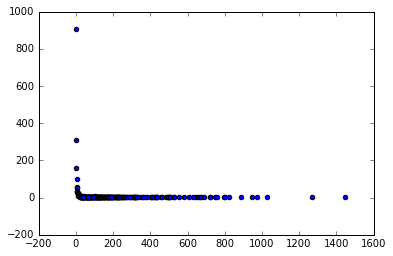

In [14]:
#show and plot these occurences
x=list(dd.keys())
y=list(dd.values())
plt.scatter(x,y)
print(dd)

In [34]:
#traitment of one cell
xp,yp,zp,np=[],[],[],[]
with open(folder+'cell.csv',newline='') as file:
    reader = csv.reader(file)
    for line in reader:
        xp.append(line[1])
        yp.append(line[2])
        zp.append(line[4])
        np.append(line[5])
xp=[float(i) for i in xp]
yp=[float(i) for i in yp]
zpT=[int(i) for i in zp]
np=[int(i) for i in np]

In [35]:
cutting_time=60*24
zp=[i%cutting_time for i in zpT]

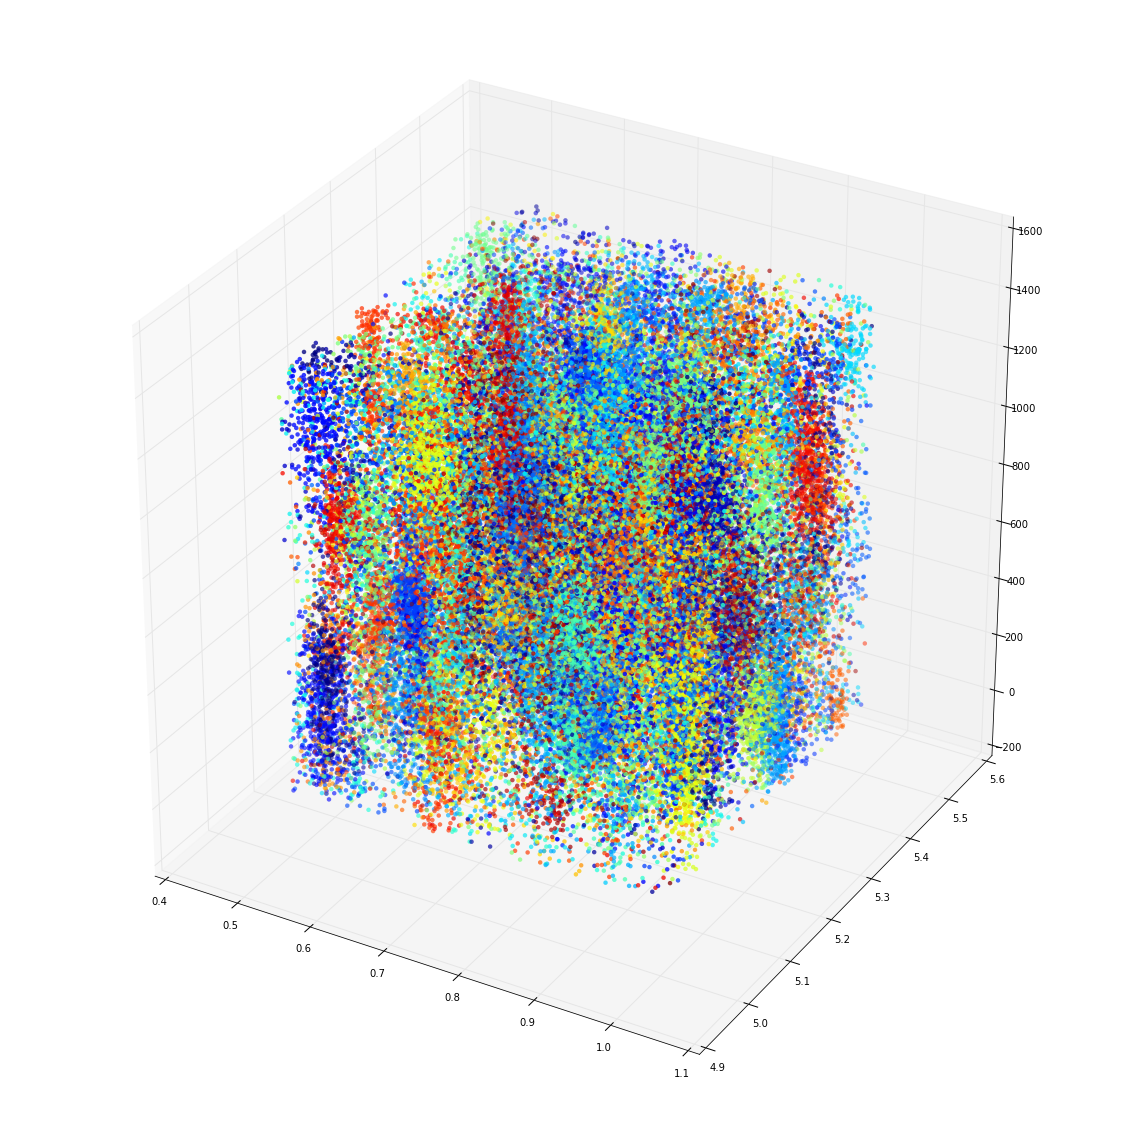

In [39]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xp,yp,zp,c=np,linewidths=0)#

In [226]:
cutting_time=60*24*7
zp2=[i%cutting_time for i in zpT]

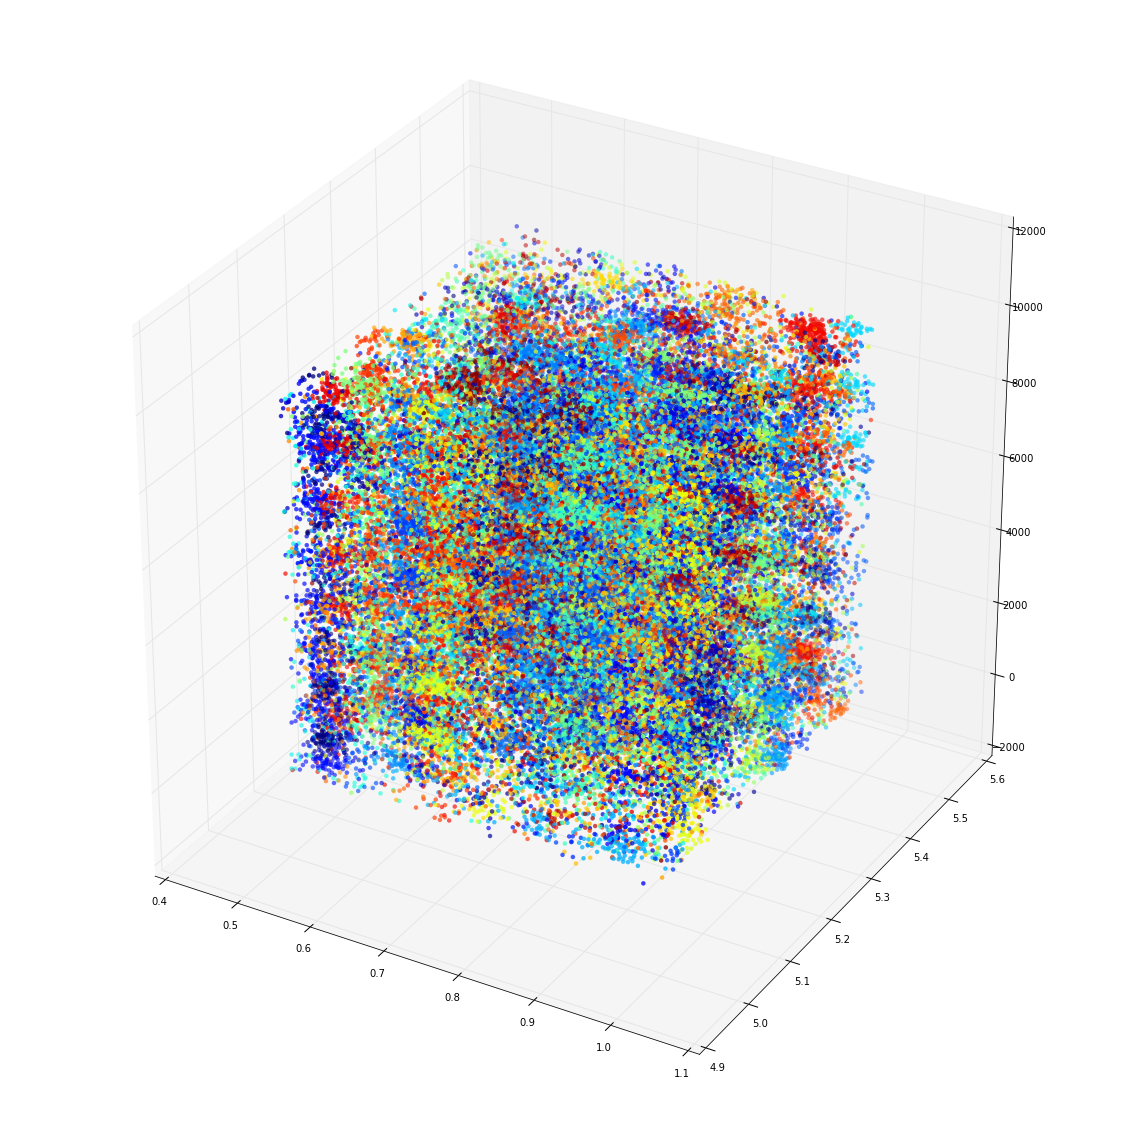

In [227]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xp,yp,zp2,c=np,linewidths=0)#

In [32]:
#xpF,ypF,zpF,npF
biggest_group=[i for i in d if d[i] in sorted(d.values(),reverse=True)[0:5]]
print(biggest_group)

[4064239714, 9199874625, 4892146204, 6612851702, 2978025054]


In [46]:
#select elements from the 5 previous groups
xpF,ypF,zpF,npF=zip(*[[a,b,c,d] for a,b,c,d in zip(xp,yp,zp,np) if d in biggest_group])

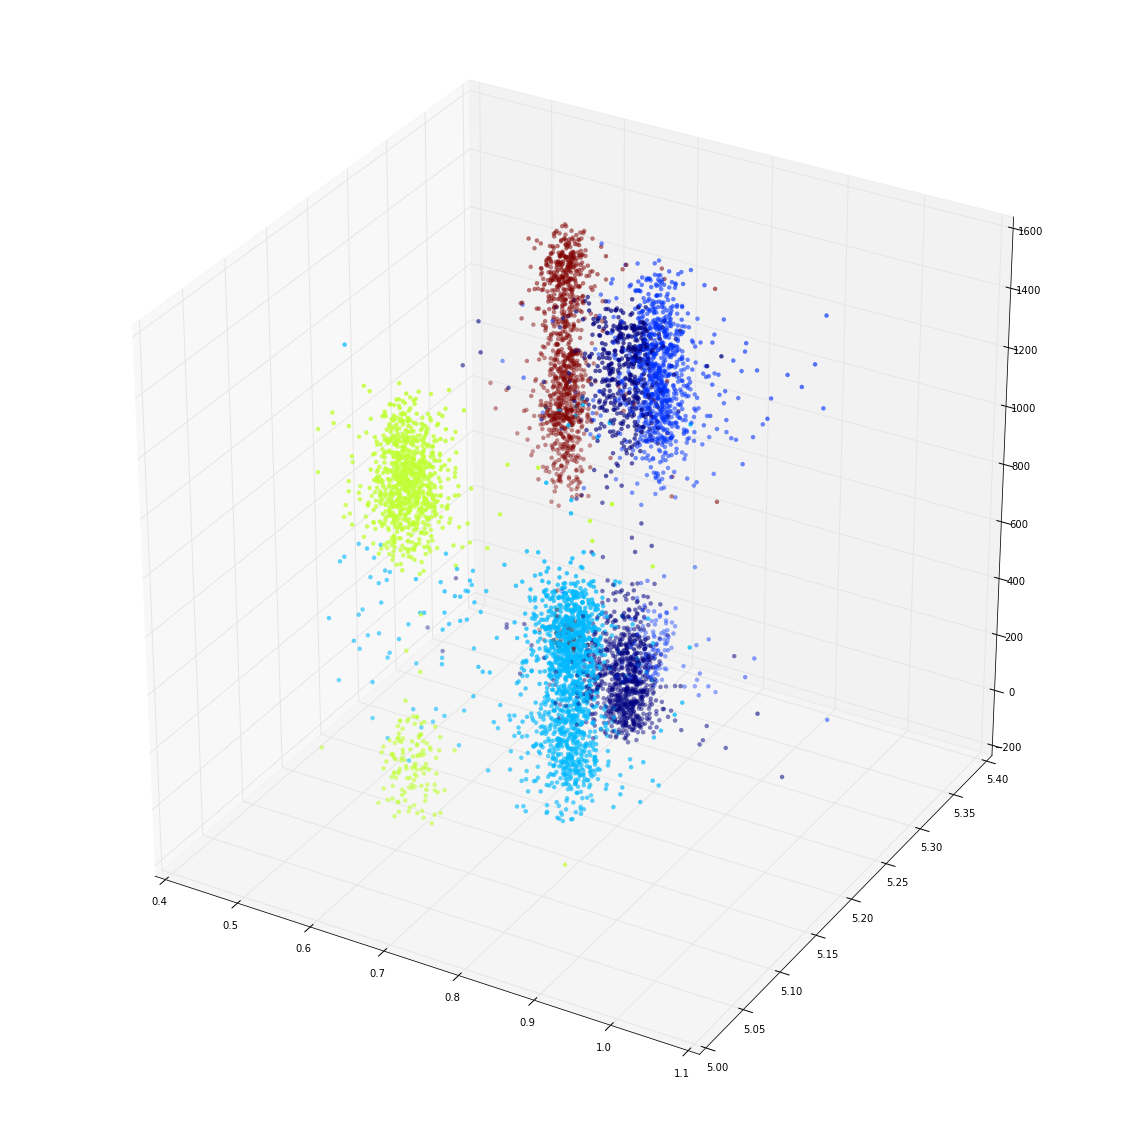

In [49]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpF,ypF,zpF,c=npF,linewidths=0)#

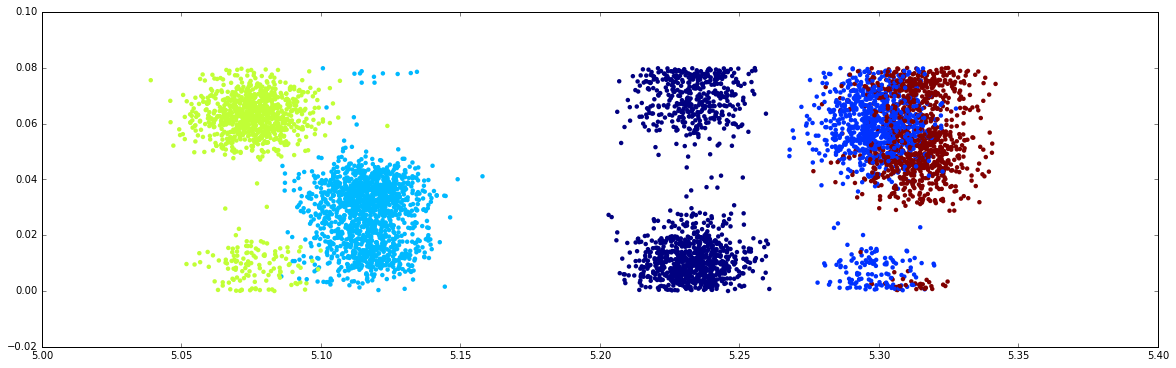

In [75]:
#find proportions to have unit circle in all 3 prjections
proportions=[1/2,1,1/18000]
xG,yG,zG,nG=zip(*[(a*proportions[0],b*proportions[1],c*proportions[2],d) for a,b,c,d in zip(xpF,ypF,zpF,npF)])
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111,aspect=1)
ax.scatter(yG,zG,c=nG,linewidths=0)#

In [1]:
#SMALLER SQUARE

In [6]:
xm,xM,ym,yM=5,5.25,7.5,7.75
#create cell (a file with a sub-part of events)
with open(folder+'subcell.csv', 'w',newline='') as file:
    writter = csv.writer(file)
    with open(training,newline='') as f :
        reader=csv.reader(f)
        reader.__next__()
        for line in reader:
            x,y=float(line[1]),float(line[2])
            if xm < x and x < xM and ym < y and y < yM:
                writter.writerow(line)

In [7]:
#traitment of one cell
x,y,z,n=[],[],[],[]
with open(folder+'subcell.csv',newline='') as file:
    reader = csv.reader(file)
    for line in reader:
        x.append(float(line[1]))
        y.append(float(line[2]))
        z.append(float(line[4]))
        n.append(float(line[5]))

In [22]:
#count occurence of place_id
count=collections.defaultdict(int)
for vn in n:
    count[vn]+=1

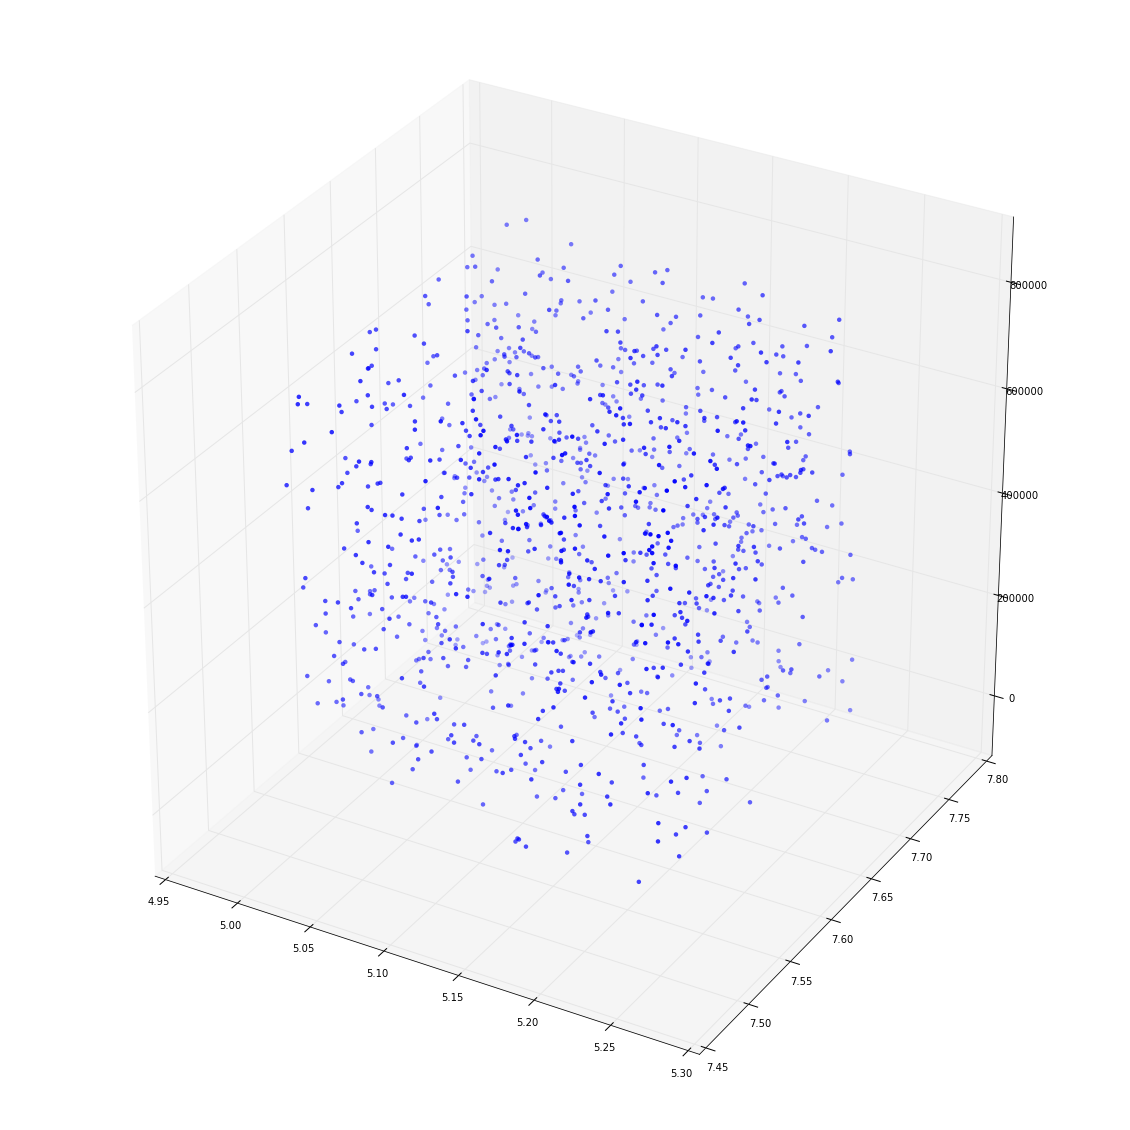

In [25]:
#position of elements of less than 5 occurences
list_temp=[(vx,vy,vz,vn) for vx,vy,vz,vn in zip(x,y,z,n) if count[vn]<5]
list_temp=list(zip(*list_temp))
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(list_temp[0],list_temp[1],list_temp[2],linewidths=0)

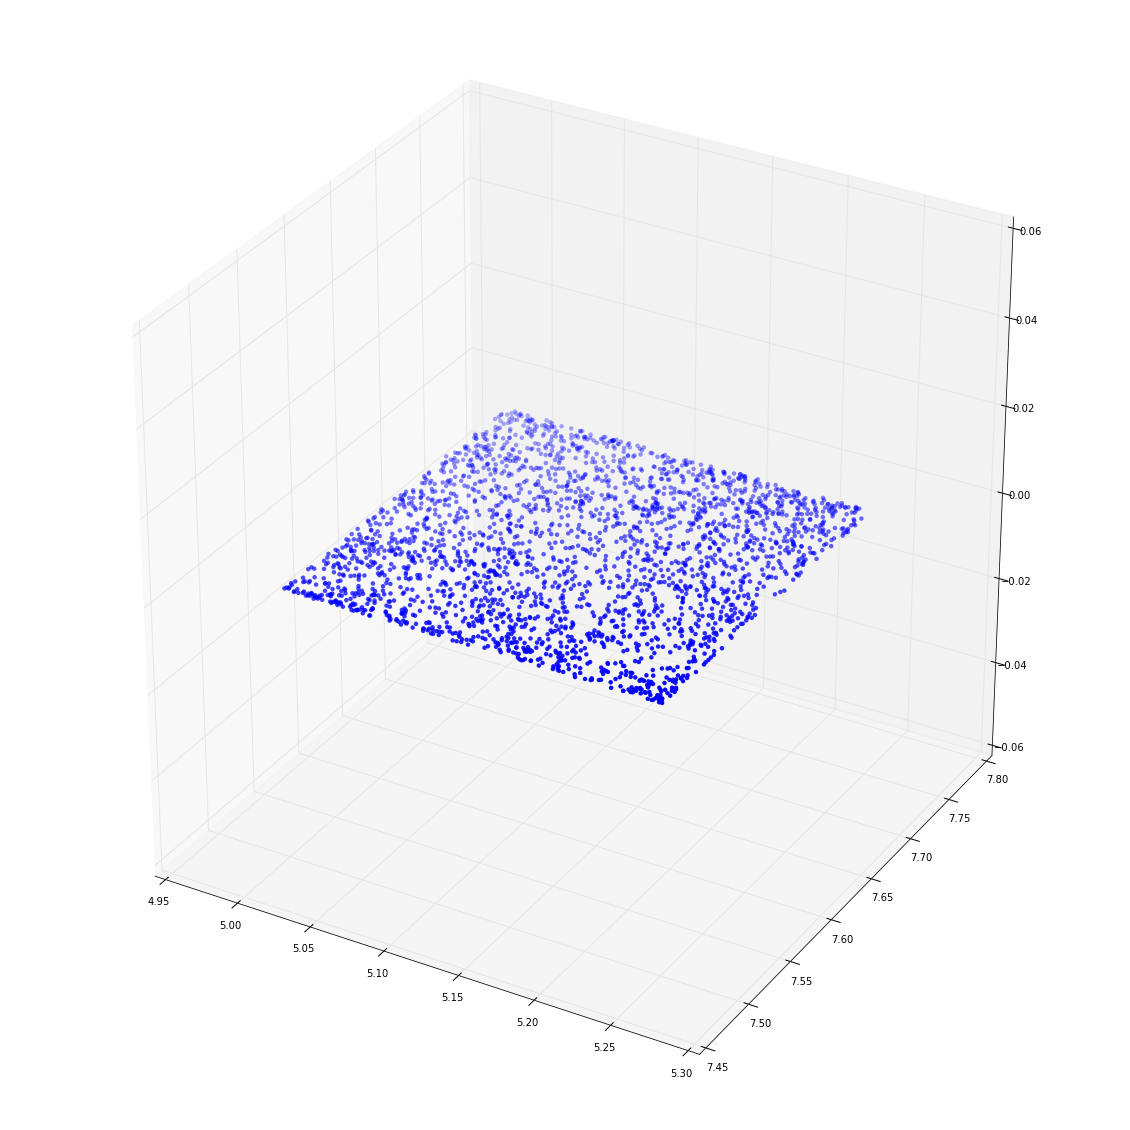

In [27]:
#position of elements of less than 25 occurences
list_temp=[(vx,vy,vz,vn) for vx,vy,vz,vn in zip(x,y,z,n) if count[vn]<25]
list_temp=list(zip(*list_temp))
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(list_temp[0],list_temp[1],linewidths=0)

In [31]:
for a in count:
    print(a,count[a])

9925566466.0 13
5605318669.0 13
8472623120.0 472
1480179729.0 1
8535908370.0 1
9563164691.0 1
2006312980.0 1
5050277909.0 1
6142924822.0 2
1515454489.0 154
7197913114.0 1
2609375259.0 1
7588640799.0 7
4036986912.0 1
6417741488.0 1
8792295459.0 12
6631690276.0 1
4589656101.0 1
4256102438.0 1
8909893672.0 1
5018546217.0 3
3924656170.0 6
1771155499.0 5
9192626221.0 1
9875003439.0 401
5409292336.0 1
3505344083.0 3
2246686771.0 1
5475125300.0 1
9277043038.0 6
5622466618.0 1
1405329759.0 2
1949380668.0 1
5050613821.0 20
8436004928.0 5
1678680130.0 1
1900300355.0 1
5662311094.0 2
2158747718.0 2
3632961607.0 115
7358638153.0 1
9399017547.0 2
9088294988.0 12
1318148173.0 2
4066498638.0 64
2127222863.0 17
1865527388.0 1
2026285082.0 1
1653709155.0 1
8575883348.0 1
9935458389.0 5
1710463673.0 2
9120266329.0 2
7108522075.0 18
5576343508.0 1
7511165024.0 12
1563947024.0 1
3626389602.0 1
1413505124.0 1
8694427749.0 1
8550504550.0 7
8692004881.0 1
9459801493.0 1
4040325258.0 1
5723134064.0 1
61780255

In [37]:
biggest={}
for a in count:
    if count[a]>100:
        biggest[a]=count[a]
len(biggest)

37

In [38]:
#file with the 37 biggest families
with open(folder+'subcell100.csv', 'w',newline='') as file:
    writter = csv.writer(file)
    with open(folder+'subcell.csv',newline='') as f :
        reader=csv.reader(f)
        reader.__next__()
        for line in reader:
            n=float(line[5])
            if count[n]>100:
                writter.writerow(line)

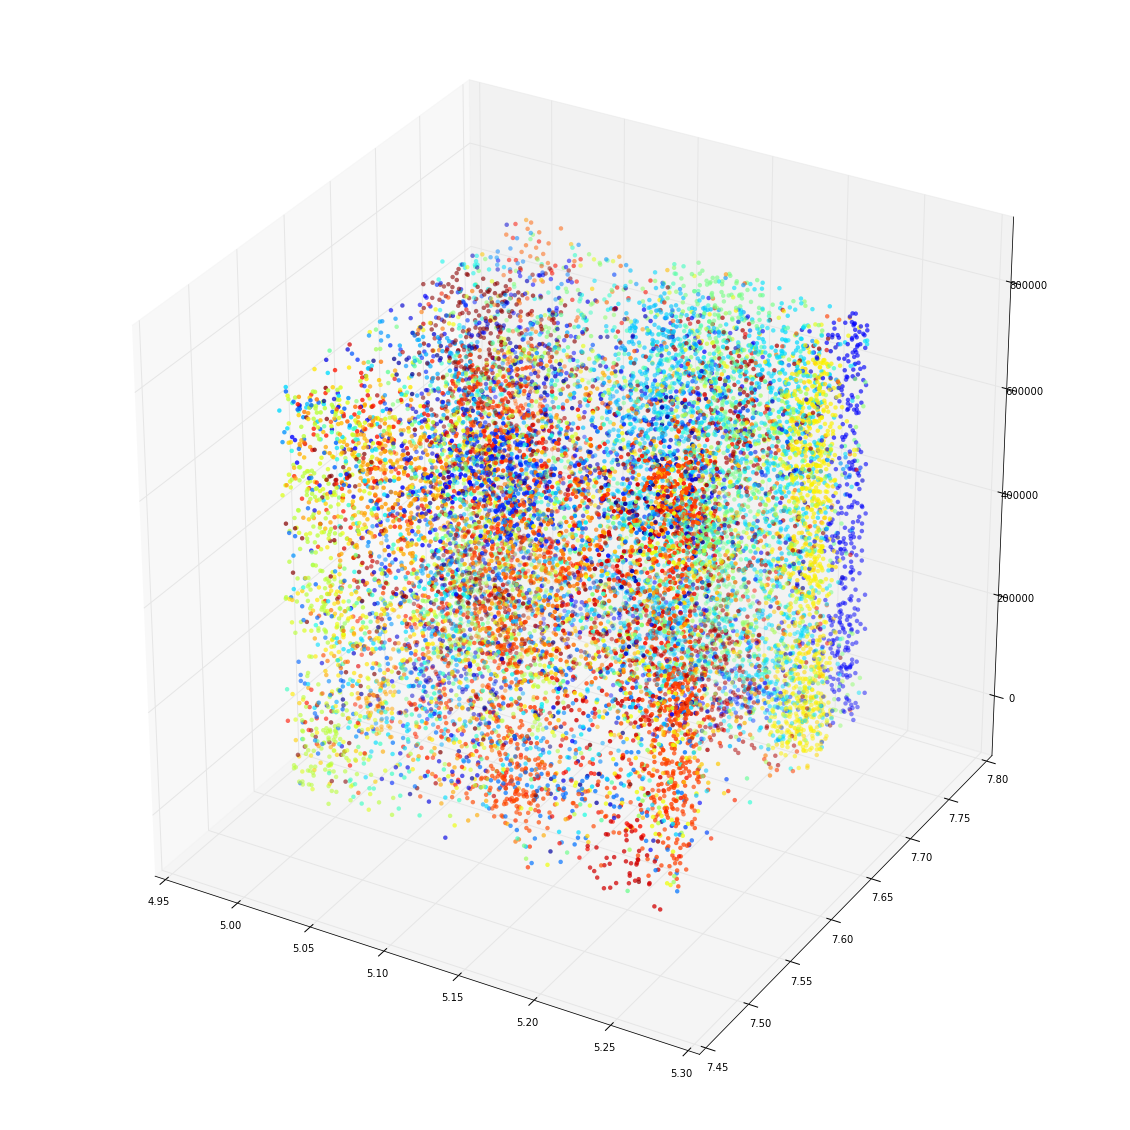

In [41]:
#lets plot it
x,y,z,n=[],[],[],[]
with open(folder+'subcell.csv',newline='') as file:
    reader = csv.reader(file)
    for line in reader:
        x.append(float(line[1]))
        y.append(float(line[2]))
        z.append(float(line[4]))
        n.append(float(line[5]))
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=n,linewidths=0)